In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data/test_sentence_matching.csv")
data

,title1,title2,ismatch
0,Inside Search Party: The Cast talks Casting,The Cast talks Casting,1
1,Inside Search Party: The Cast talks Casting,Casting,0
2,Inside Search Party: The Cast talks Casting,"Inside Reel, Interview with the Cast",0
3,Inside Search Party: The Impact of Music,The Impact of Music,1
4,Inside Search Party: The Impact of Music,Point of Impact,0
5,Inside Search Party: The Impact of Music,Edge of Impact,0
6,Nicole Scherzinger vs. Lil Rel Howery,Nicole Scherzinger vs. Lil Rel Howery,1
7,Nicole Scherzinger vs. Lil Rel Howery,Lil Rel Howery vs. Nicole Scherzinger,0
8,Passenger Fatty-Seven,Passenger Fatty-Seven,1
9,Passenger Fatty-Seven,Fatty Arbuckle,0


## load Spacy Model

In [3]:
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load('en_core_web_sm')

In [4]:
test = data["ismatch"].values
test

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0])

In [5]:
test_score = np.array([])

for ind in data.index: 
    title1 = data['title1'][ind]
    title2 = data['title2'][ind]
    n_title1 = nlp(title1)
    n_title2 = nlp(title2)
    ismatch = data['ismatch'][ind]
    sim = n_title1.similarity(n_title2)
    # print(title1 + "," + title2 + ":" + str(sim) + "," + str(ismatch))
    test_score = np.append(test_score, sim)
    
test_score

/anaconda3/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger model

/anaconda3/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/anaconda3/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger model

array([0.82811833, 0.6067095 , 0.71786387, 0.880182  , 0.76315141,
       0.80292925, 1.        , 0.97592143, 1.        , 0.67487235,
       0.77483212, 0.67489559, 1.        , 0.7735664 , 1.        ,
       0.83355133, 1.        , 0.71280417, 0.94469593, 0.70353053,
       0.9135826 , 0.68174803, 0.9819676 , 0.89850818])

## Precision Recall by Different thresholds

In [8]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test, test_score)

Text(0.5,1,'2-class Precision-Recall curve: AP=0.69')

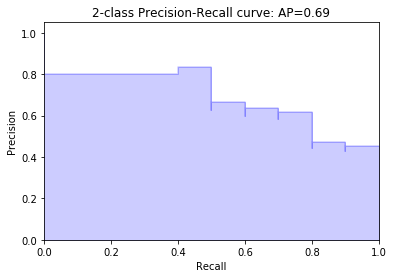

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, thresholds = precision_recall_curve(test, test_score)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [19]:
thresholds

array([0.67489559, 0.68174803, 0.70353053, 0.71280417, 0.71786387,
       0.76315141, 0.7735664 , 0.77483212, 0.80292925, 0.82811833,
       0.83355133, 0.880182  , 0.89850818, 0.9135826 , 0.94469593,
       0.97592143, 0.9819676 , 1.        ])